*This Notebook has been created by PALISSON Antoine.*<br>


In [1]:
# Basic packages
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Tensorflow
import tensorflow as tf

# Preprocessing

In this exercise, we will use a financial dataset: `'bank.csv'`.

**<font color='blue'>1. Load the dataset and show its content.**

In [2]:
data = pd.read_csv("bank.csv", index_col=0)
data.head(10)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,,,,,,,,,,,,,,,,
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes


**<font color='blue'>2. Separate the features and the label (the `deposit` variable).**

In [3]:
data_set = data.copy()
y = data_set.pop('deposit')
X = data_set

l**<font color='blue'>3. Create a test and validation set.**

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.1 / (1 - 0.2), random_state=42)

train_X.shape, train_y.shape, test_X.shape, test_y.shape, val_X, val_y

((7812, 15),
 (7812,),
 (2233, 15),
 (2233,),
              job   marital  education default  balance housing loan   
 age                                                                   
 41   blue-collar   married  secondary      no     1236     yes   no  \
 47   blue-collar   married  secondary      no     1230     yes   no   
 57        admin.    single  secondary      no     2223      no   no   
 43    management  divorced   tertiary      no        1     yes  yes   
 60       retired   married  secondary      no        7      no  yes   
 ..           ...       ...        ...     ...      ...     ...  ...   
 34    management    single    unknown      no     6013     yes   no   
 49      services   married  secondary      no     2416     yes   no   
 37    management   married   tertiary      no     1689     yes   no   
 40    technician   married  secondary      no      503     yes   no   
 35    technician    single  secondary      no     2144     yes   no   
 
        contact 

**<font color='blue'>4. Preprocess the data.**

*Tips: The preprocessing is different for the numerical and the categorical data*

In [5]:
ohe = OneHotEncoder()
std = StandardScaler()
num_col = train_X.select_dtypes(include='number').columns
cat_col = train_X.select_dtypes(include='object').columns

In [6]:
ct = ColumnTransformer([
    ('cat', ohe, cat_col),
    ('num', std, num_col),
])

X_train_scl = ct.fit_transform(train_X)
X_val_scl = ct.transform(val_X)
X_test_scl = ct.transform(test_X)

In [7]:
lbl = LabelEncoder()

y_train_scl = lbl.fit_transform(train_y.to_numpy().reshape(-1, 1))
y_val_scl = lbl.transform(val_y.to_numpy().reshape(-1, 1))
y_test_scl = lbl.transform(test_y.to_numpy().reshape(-1, 1))

C:\ProgramData\anaconda3\envs\DNN\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\envs\DNN\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\ProgramData\anaconda3\envs\DNN\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# Benchmark

In this part, you will build a **benchmark** to compare the effect of the vanishing/exploding gradient and overfitting tools.

Here is a small function that should be run before every training to reset the seeds.<br> This ensures that the **randomness is always the same during training**, hence making the results comparable.

In [8]:
def reset_seeds():
    os.environ['PYTHONHASHSEED'] = str(2)
    tf.random.set_seed(2)
    np.random.seed(2)
    random.seed(2)

**<font color='blue'>1. Build a model architecture that contains 2 hidden layers with 16 neurons and a ReLU activation.<br> The remaining parameters are set to default.<br> Add the appropriate output layer.**

*Tips: You should run the reset_seeds() function at the beginning of the cell.*

In [9]:
reset_seeds()
tf.keras.backend.clear_session()
model = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scl.shape[1],)),
                             tf.keras.layers.Dense(units=16, activation='relu'),
                             tf.keras.layers.Dense(units=16, activation='relu'),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')])


**<font color='blue'>2. Compile the model with the SGD optimizer and the appropriate loss.**

In [10]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**<font color='blue'>3. Train the model for 20 epochs with a batch size of 32.**

*Tips: Don't forget the validation data !*

In [12]:
history = model.fit(X_train_scl, y_train_scl,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_val_scl, y_val_scl))

Epoch 1/20
245/245 [==============================] - 2s 3ms/step - loss: 0.6877 - binary_accuracy: 0.5376 - val_loss: 0.6757 - val_binary_accuracy: 0.6088
Epoch 2/20
245/245 [==============================] - 0s 1ms/step - loss: 0.6557 - binary_accuracy: 0.6499 - val_loss: 0.6323 - val_binary_accuracy: 0.7081
Epoch 3/20
245/245 [==============================] - 0s 2ms/step - loss: 0.6003 - binary_accuracy: 0.7209 - val_loss: 0.5592 - val_binary_accuracy: 0.7601
Epoch 4/20
245/245 [==============================] - 0s 1ms/step - loss: 0.5282 - binary_accuracy: 0.7619 - val_loss: 0.4882 - val_binary_accuracy: 0.7950
Epoch 5/20
245/245 [==============================] - 0s 1ms/step - loss: 0.4784 - binary_accuracy: 0.7878 - val_loss: 0.4522 - val_binary_accuracy: 0.7986
Epoch 6/20
245/245 [==============================] - 0s 1ms/step - loss: 0.4540 - binary_accuracy: 0.7984 - val_loss: 0.4368 - val_binary_accuracy: 0.8102
Epoch 7/20
245/245 [==============================] - 0s 1ms/ste

**<font color='blue'>4. Display the loss curves (training & validation).** 

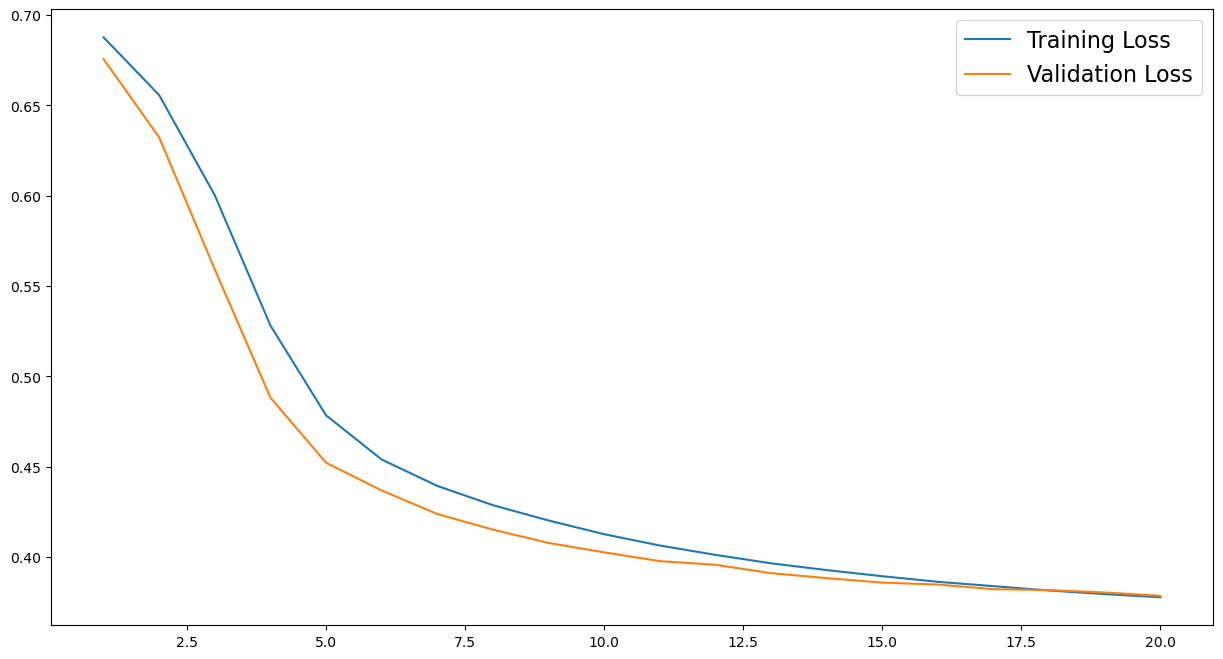

In [13]:
def show_loss_curves(history, history_benchmark=None):
    loss = history.history

    plt.figure(figsize=(15, 8))

    plt.plot(np.arange(1, 21), loss['loss'], label='Training Loss')
    plt.plot(np.arange(1, 21), loss['val_loss'], label='Validation Loss')

    if history_benchmark:
        plt.plot(np.arange(1, 21), history_benchmark.history['loss'], label='Training Loss - Default Init')
        plt.plot(np.arange(1, 21), history_benchmark.history['val_loss'], label='Validation Loss - Default Init')

    plt.legend(fontsize=16)
    plt.show()


show_loss_curves(history)

# Vanishing/Explodient gradient tools

## Weight Initialization

**The Tensorflow default initialization method for the dense layers is the Glorot Uniform**.

However, the ReLU activation function works best with the He initialization.<br> It has two main forms: the uniform and the normal ones.

In Tensorflow, you can specify the the weigth initialization, you can use the `kernel_initializer` parameter. <br>The available weigth initialization methods can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/initializers).

**<font color='blue'>Re-build the Benchmarck network with the He initialization for the hidden layers.<br> Train it and compare the results with the benchmark**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
245/245 [==============================] - 1s 2ms/step - loss: 0.6737 - binary_accuracy: 0.5914 - val_loss: 0.6297 - val_binary_accuracy: 0.6974
Epoch 2/20
245/245 [==============================] - 0s 1ms/step - loss: 0.5965 - binary_accuracy: 0.7049 - val_loss: 0.5381 - val_binary_accuracy: 0.7592
Epoch 

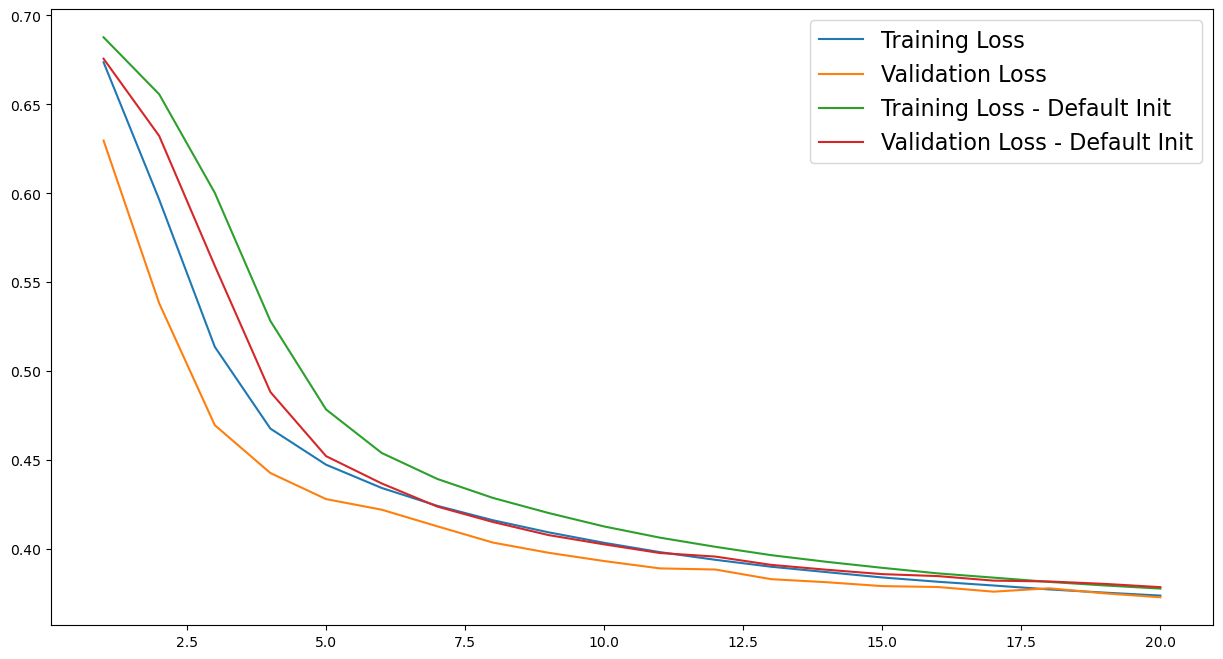

In [14]:
reset_seeds()
tf.keras.backend.clear_session()

model_2 = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scl.shape[1],)),
                               tf.keras.layers.Dense(units=16, activation='relu',
                                                     kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.Dense(units=16, activation='relu',
                                                     kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
                               ])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=[tf.keras.metrics.BinaryAccuracy()])
model_2.summary()

history_2 = model_2.fit(X_train_scl, y_train_scl,
                        batch_size=32,
                        epochs=20,
                        validation_data=(X_val_scl, y_val_scl))

show_loss_curves(history_2, history)

## ReLU variants

The ReLU activation function has many variants that may be useful to alleviate the dying ReLU and vanishing/exploding gradient problems.

The Tensorflow activation functions can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/activations).<br> You can also use the [Activation "layer" tool](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation). 

The Leaky ReLU can only be used as a layer : `tf.keras.layers.LeakyReLU()`.<br>Thus, you must add it after each dense layers which should also have their activation parameters set to None. 

**<font color='blue'>1.a. Re-build the network with the Leaky ReLU (set its alpha parameter to 0.1) for the hidden layers and choose the appropriate weight initilization method.<br>1.b Show the model summary.<br> 1.c.Train it and compare the results with the Benchmark**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
245/245 [==============================] - 

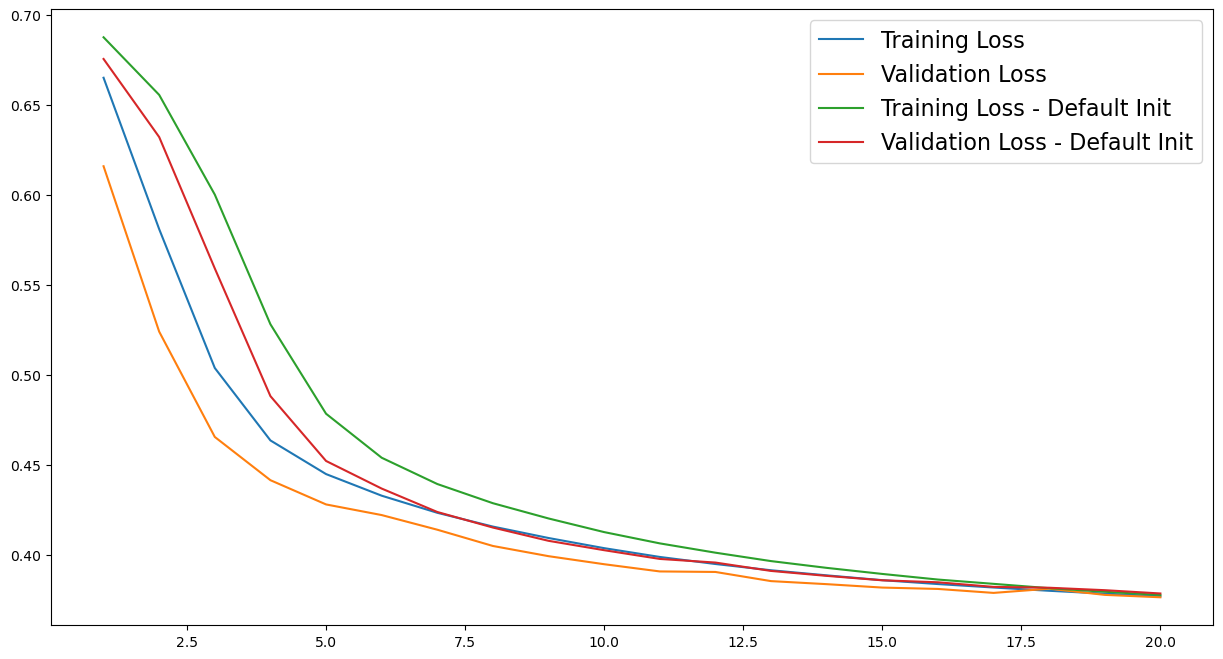

In [15]:
reset_seeds()
tf.keras.backend.clear_session()

model_3 = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scl.shape[1],)),
                               tf.keras.layers.Dense(units=16,
                                                     kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.LeakyReLU(alpha=0.1),
                               tf.keras.layers.Dense(units=16,
                                                     kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.LeakyReLU(alpha=0.1),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
                               ])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=[tf.keras.metrics.BinaryAccuracy()])
model_3.summary()

history_3 = model_3.fit(X_train_scl, y_train_scl,
                        batch_size=32,
                        epochs=20,
                        validation_data=(X_val_scl, y_val_scl))

show_loss_curves(history_3, history)

**<font color='blue'>2. Do the same for the ELU activation function.**

*Tips: As opposed to the leaky ReLU, the ELU can be added directly inside the dense layers.*

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
245/245 [==============================] - 1s 2ms/step - loss: 0.6039 - binary_accuracy: 0.6784 - val_loss: 0.5243 - val_binary_accuracy: 0.7663
Epoch 2/20
245/245 [==============================] - 0s 1ms/step - loss: 0.4978 - binary_accuracy: 0.7741 - val_loss: 0.4637 - val_binary_accuracy: 0.8057
Epoch 

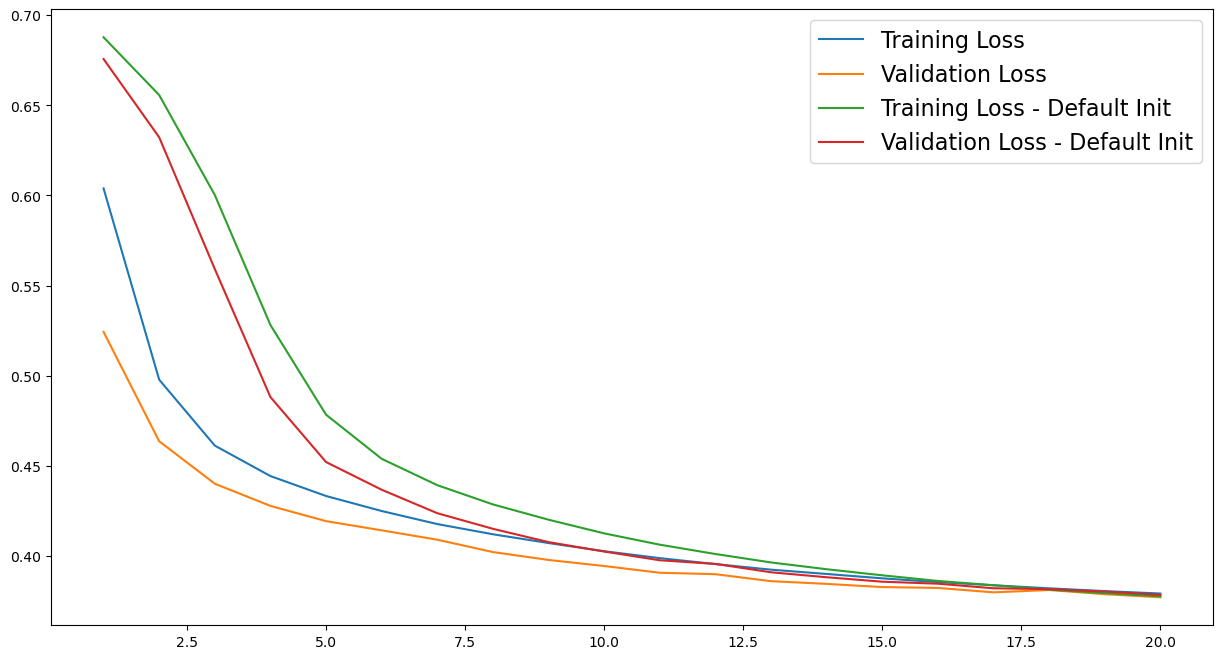

In [16]:
reset_seeds()
tf.keras.backend.clear_session()

model_4 = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scl.shape[1],)),
                               tf.keras.layers.Dense(units=16, activation='elu',
                                                     kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.Dense(units=16, activation='elu',
                                                     kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
                               ])
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=[tf.keras.metrics.BinaryAccuracy()])
model_4.summary()

history_4 = model_4.fit(X_train_scl, y_train_scl,
                        batch_size=32,
                        epochs=20,
                        validation_data=(X_val_scl, y_val_scl))

show_loss_curves(history_4, history)

**<font color='blue'>3. Do the same for the SELU activation function.<br> Comment the results.**

*Tips: What should be the weight initialization method for the SELU ?*

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
245/245 [==============================] - 1s 2ms/step - loss: 0.5615 - binary_accuracy: 0.7153 - val_loss: 0.4768 - val_binary_accuracy: 0.7932
Epoch 2/20
245/245 [==============================] - 0s 1ms/step - loss: 0.4645 - binary_accuracy: 0.7943 - val_loss: 0.4416 - val_binary_accuracy: 0.8093
Epoch 

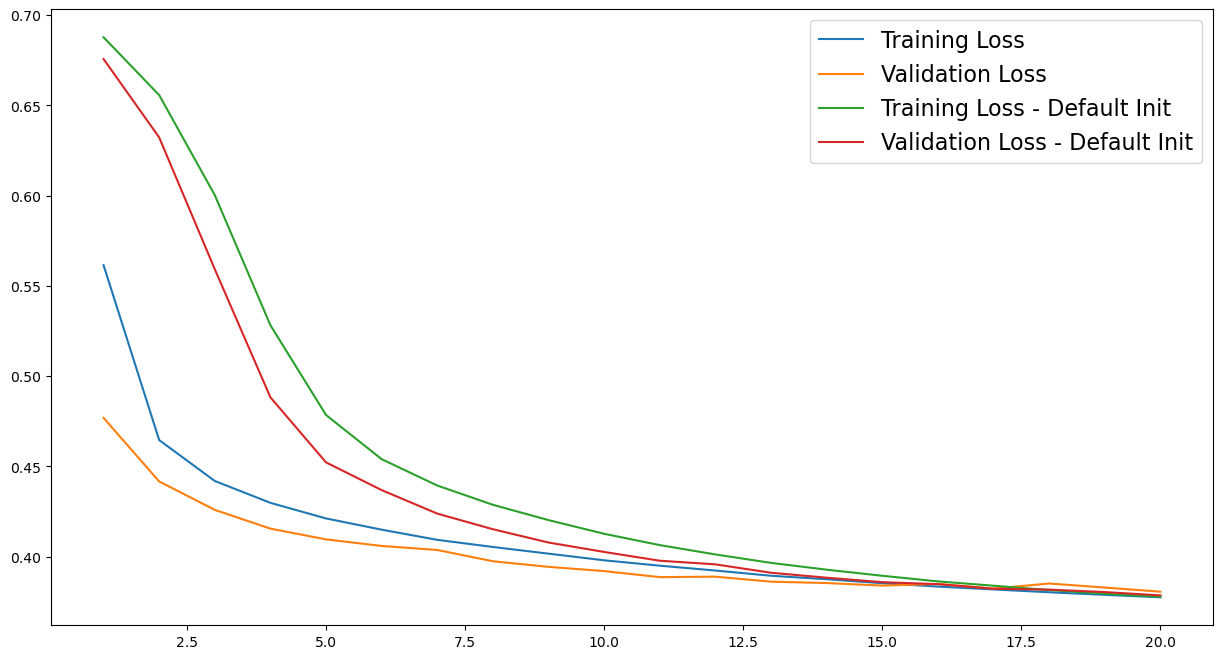

In [17]:
reset_seeds()
tf.keras.backend.clear_session()

model_4 = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scl.shape[1],)),
                               tf.keras.layers.Dense(units=16, activation='selu',
                                                     kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.Dense(units=16, activation='selu',
                                                     kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
                               ])
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=[tf.keras.metrics.BinaryAccuracy()])
model_4.summary()

history_4 = model_4.fit(X_train_scl, y_train_scl,
                        batch_size=32,
                        epochs=20,
                        validation_data=(X_val_scl, y_val_scl))

show_loss_curves(history_4, history)

## Batch Normalization

In Tensorflow, the Batch Normalization `tf.keras.layers.BatchNormalization()` is considered as a layer of the network.<br>In order to be effective, **it should be placed after each hidden layer**.

In general, **it is recommended to apply the Batch Normalization layer before the activation function of the hidden layers**. Note that **it is also possible to apply the Batch Normalization method after the input layer**.

> <font color='grey'>*The reason for this is that the Batch Normalization layer performs normalization on the input data, which can cause the distribution of the input values to be shifted and scaled. If the activation function is applied before the Batch Normalization layer, the activation function may discard or modify the information provided by the Batch Normalization layer, leading to suboptimal performance.*

The Tensorflow implementation can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization).<br>It has several parameters (initialization, regularization ...) including a **`momentum` parameter that controls the exponential moving average decay rate** of the batch statistics.

> <font color='grey'>*During training, the mean and variance of the current batch are computed and used for normalization. These values are then combined with the running mean and variance using the momentum parameter to update the running statistics. <br>The running mean and variance are used for normalization during inference. By default, the momentum is set to 0.99, which means that 99% of the information from the previous running statistics is retained and 1% of the information from the current batch statistics is used to update them.*

**<font color='blue'>1.a.Re-build the network with the batch normalization method.<br>1.b. Show its summary.<br>1.c.Train it and compare the results with the Benchmark**

*Tips: Don't forget to use the activation of the hidden layer after the batch normalization.<br> You can use the tf.keras.layers.Activation() layer.*

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 16)                0

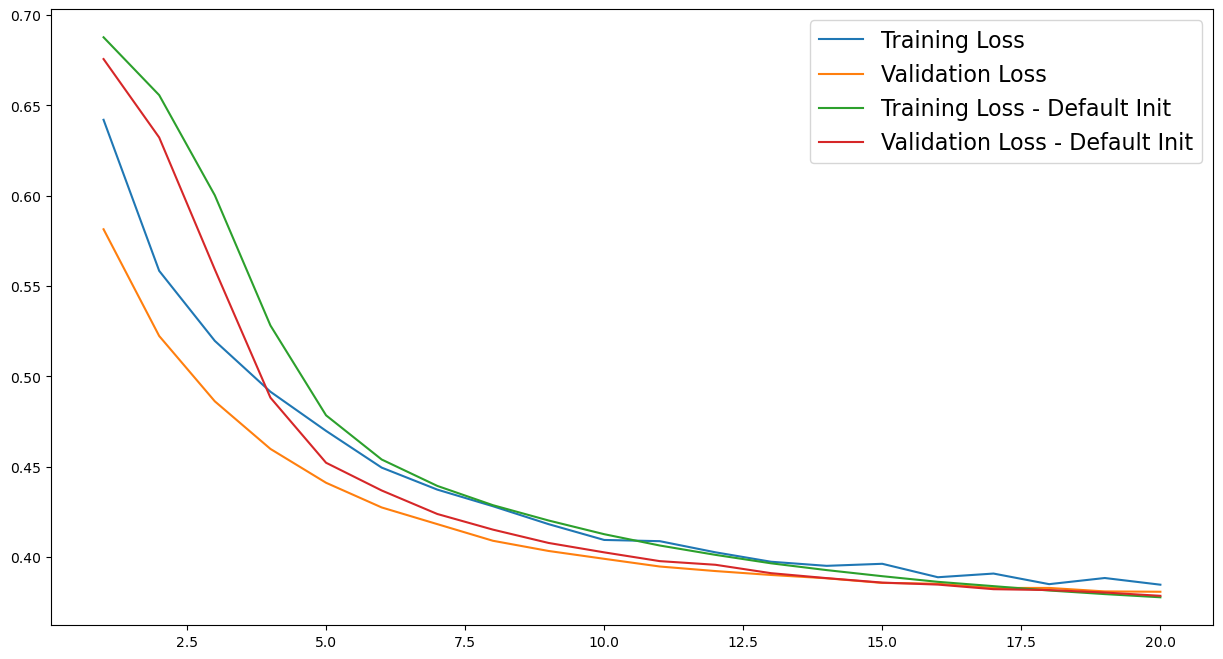

In [18]:
reset_seeds()
tf.keras.backend.clear_session()

model_5 = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scl.shape[1],)),
                               tf.keras.layers.Dense(units=16, kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(units=16, kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
                               ])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=[tf.keras.metrics.BinaryAccuracy()])
model_5.summary()

history_5 = model_5.fit(X_train_scl, y_train_scl,
                        batch_size=32,
                        epochs=20,
                        validation_data=(X_val_scl, y_val_scl))

show_loss_curves(history_5, history)

## Gradient Clipping

In Tensorflow, Gradient Clipping involves computing the gradient "manually' with the `tf.clip_by_value()` function.<br> It will be done in an other Notebook.

# Overfitting tools

## Early Stopping

**In Tensorflow, Early stopping can be done using the callbacks.**

Callbacks are a powerful feature in TensorFlow that allow you to customize and control the training process of your model. Callbacks are objects that can be passed to the `fit()` method of a Keras model to be executed at various points during training, such as at the end of each epoch or after each batch. 

```
history = model.fit(...,
                    callbacks = [cb_1, ..., cb_n])
```

The Early Stopping callback can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping).<br> Here are the most important parameters of the EarlyStopping callback:

* **monitor**: *This parameter specifies the metric to monitor during training. The callback will stop the training process when the monitored metric stops improving. For example, `monitor='val_loss'` will monitor the validation loss during training.*

* **patience**: *This parameter specifies the number of epochs to wait before stopping the training process when the monitored metric stops improving. For example, `patience=5` will wait for 5 epochs before stopping the training process if the monitored metric does not improve.*

* **mode**: *This parameter specifies whether the monitored metric should be maximized or minimized. For example, `mode='min'` will stop the training process when the validation loss stops decreasing.*

* **restore_best_weights**: *This parameter controls whether the weights of the model should be set to the best weights observed during training when the training process is stopped early. If `restore_best_weights=True`, the weights of the model will be set to the best weights, and the training process will be terminated. If `restore_best_weights=False`, the weights of the model at the end of the training process will be used.*

* **min_delta** & **baseline**: *These two parameters specifies the minimum improvement (`min_delta`) or threshold (`baseline`) of the monitored metric to stop the training process.  For example, the training will be stopped if the monitored metric is below the `treshold` or doesn't improve improve much than `min_delta`.*

A list of the other available builtin callbacks can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks).

**<font color='blue'>1.a.Create an Early Stopping callback with a `patience` parameter set to 3 and a `restore_best_weights` one set to True.**

In [19]:
reset_seeds()
tf.keras.backend.clear_session()

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model_6 = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scl.shape[1],)),
                               tf.keras.layers.Dense(units=16, kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(units=16, kernel_initializer=tf.initializers.HeNormal()),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
                               ])
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=[tf.keras.metrics.BinaryAccuracy()])
model_6.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 16)                0

**<font color='blue'>1.b. Re-build the benchmark network and *Train it for 100 epochs with the Early Stopping method.<br> Display the learning curves and comment them.**

*Tips: Don't forget to add the early stopping callback when run the `fit()` !*

In [20]:
history_6 = model_6.fit(X_train_scl, y_train_scl, epochs=100, batch_size=32,
                    validation_data=(X_val_scl, y_val_scl),
                    callbacks=[early_stopping_cb])

Epoch 1/100
245/245 [==============================] - 2s 2ms/step - loss: 0.6420 - binary_accuracy: 0.6352 - val_loss: 0.5814 - val_binary_accuracy: 0.7216
Epoch 2/100
245/245 [==============================] - 0s 2ms/step - loss: 0.5584 - binary_accuracy: 0.7276 - val_loss: 0.5224 - val_binary_accuracy: 0.7672
Epoch 3/100
245/245 [==============================] - 0s 2ms/step - loss: 0.5197 - binary_accuracy: 0.7544 - val_loss: 0.4862 - val_binary_accuracy: 0.7941
Epoch 4/100
245/245 [==============================] - 0s 2ms/step - loss: 0.4915 - binary_accuracy: 0.7710 - val_loss: 0.4598 - val_binary_accuracy: 0.8165
Epoch 5/100
245/245 [==============================] - 0s 2ms/step - loss: 0.4698 - binary_accuracy: 0.7866 - val_loss: 0.4411 - val_binary_accuracy: 0.8129
Epoch 6/100
245/245 [==============================] - 0s 2ms/step - loss: 0.4495 - binary_accuracy: 0.7947 - val_loss: 0.4274 - val_binary_accuracy: 0.8147
Epoch 7/100
245/245 [==============================] - 0s 

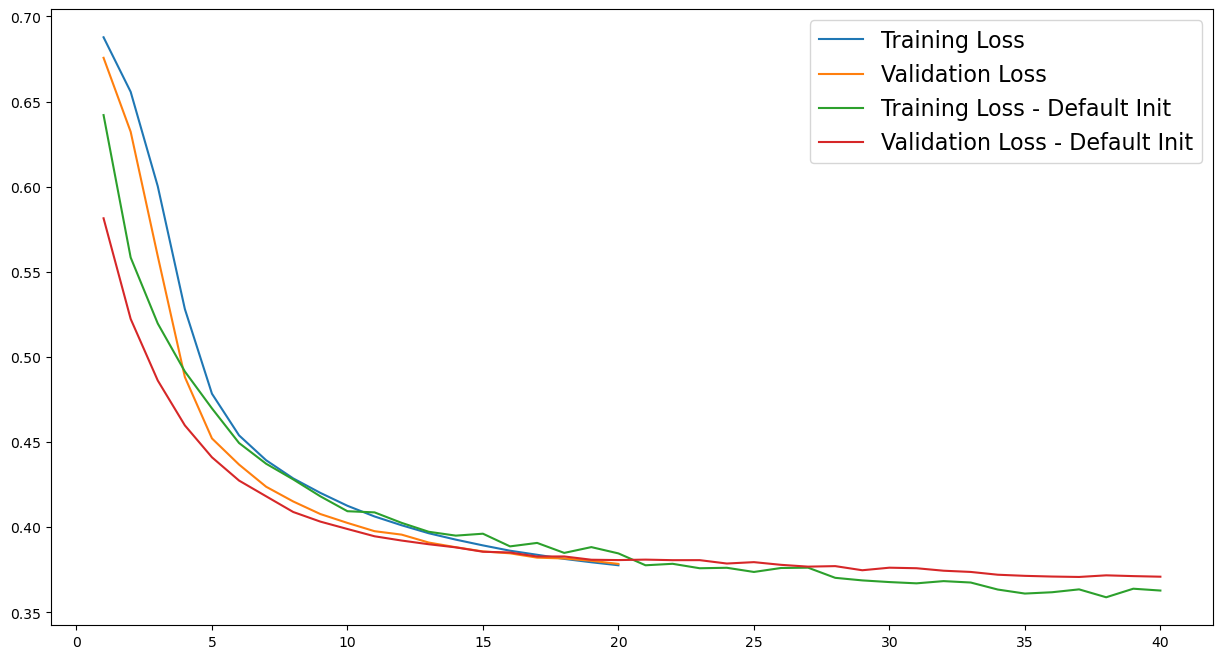

In [21]:
plt.figure(figsize=(15, 8))

plt.plot(np.arange(1, 21), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 21), history.history['val_loss'], label='Validation Loss')


plt.plot(np.arange(1, 41), history_6.history['loss'], label='Training Loss - Default Init')
plt.plot(np.arange(1, 41), history_6.history['val_loss'], label='Validation Loss - Default Init')

plt.legend(fontsize=16)
plt.show()

## Regularization

In Tensorflow, **Regularization is generally added directly in the layers** using one of the following parameter:

*   `kernel_regularizer`: *apply the regularization on both the neurons and the bias of the layer*
*   `bias_regularizer`: *apply the regularization on the bias of the layer*
*   `activity_regularizer`: *apply the regularization on the neurons of the layer*

You can find the available regularizations [here](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers). 

**<font color='blue'>Re-build the Benchmarck network with the a L1 & L2 regularization for the hidden layers.<br> Train it for 100 epochs and compare the results with the benchmark**

*Tips: The regularization effect can be very strong.<br>Start with very low values and increase if there is still some overfitting problems.*

In [22]:
reset_seeds()
tf.keras.backend.clear_session()

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model_7 = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scl.shape[1],)),
                               tf.keras.layers.Dense(units=16, kernel_initializer=tf.initializers.HeNormal(),
                                                     kernel_regularizer=tf.keras.regularizers.l1_l2()),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(units=16, kernel_initializer=tf.initializers.HeNormal(),
                                                     kernel_regularizer=tf.keras.regularizers.l1_l2()),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
                               ])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=[tf.keras.metrics.BinaryAccuracy()])
model_7.summary()
history_7 = model_7.fit(X_train_scl, y_train_scl, epochs=100, batch_size=32,
                    validation_data=(X_val_scl, y_val_scl),
                    callbacks=[early_stopping_cb])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 16)                0

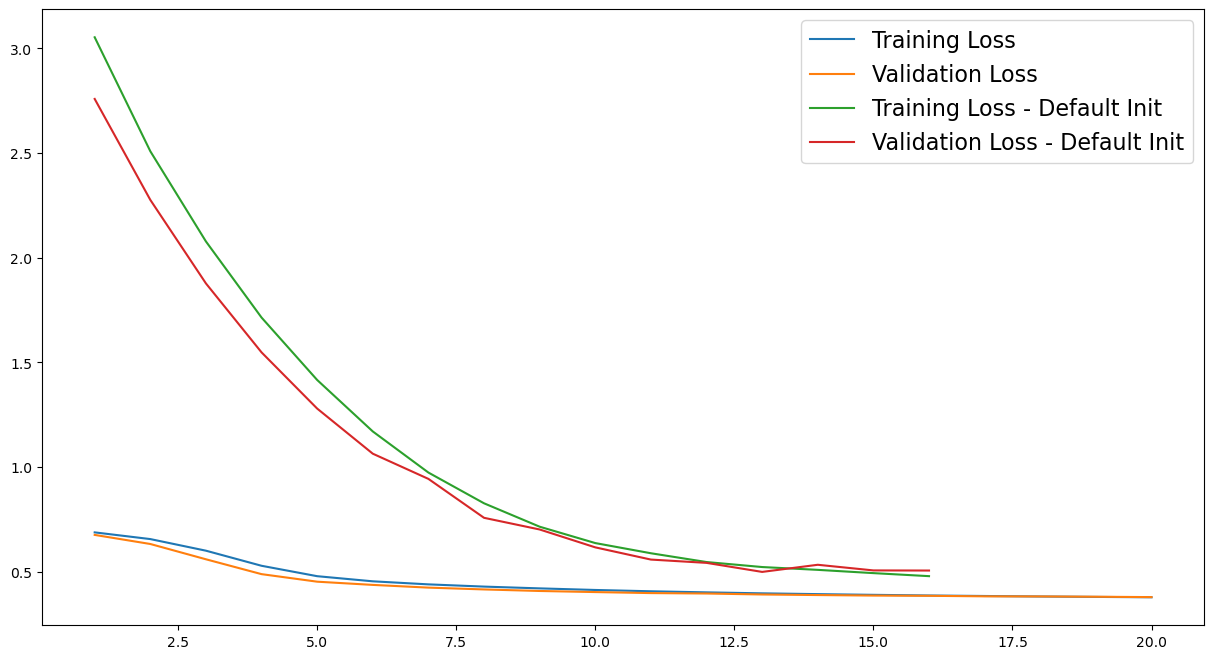

In [23]:
plt.figure(figsize=(15, 8))

plt.plot(np.arange(1, 21), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 21), history.history['val_loss'], label='Validation Loss')


plt.plot(np.arange(1, 17), history_7.history['loss'], label='Training Loss - Default Init')
plt.plot(np.arange(1, 17), history_7.history['val_loss'], label='Validation Loss - Default Init')

plt.legend(fontsize=16)
plt.show()

## Dropout

In Tensorflow, the Dropout `tf.keras.layers.Dropout()` is considered as a layer of the network.<br>

The Tensorflow implementation can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).<br> It has  two important parameters that can be used to control the behavior of the Dropout layer: rate and noise_shape.

* **rate**: *The `rate` parameter is a float value between 0 and 1 that specifies the dropout rate, or the fraction of the input units to drop during training. For example, a rate of 0.2 means that 20% of the input units will be randomly dropped out during each training step.*

* **noise_shape**: *The `noise_shape` parameter is an optional parameter that can be used to specify the shape of the binary dropout mask that is multiplied with the input. The `noise_shape` parameter should be a tuple of integers that represents the shape of the binary dropout mask, which should have the same shape as the input except for the dimensions that represent the batch size and the feature size.*

**<font color='blue'>1.a.Re-build the network with the dropout method.<br>1.b. Show its summary.<br>1.c.Train it for 50 epochs and compare the results with the Benchmark**

In [24]:
reset_seeds()
tf.keras.backend.clear_session()

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model_8 = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scl.shape[1],)),
                               tf.keras.layers.Dense(units=16, kernel_initializer=tf.initializers.HeNormal(),
                                                     kernel_regularizer=tf.keras.regularizers.l1_l2()),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(units=16, kernel_initializer=tf.initializers.HeNormal(),
                                                     kernel_regularizer=tf.keras.regularizers.l1_l2()),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Activation('relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
                               ])
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=[tf.keras.metrics.BinaryAccuracy()])
model_8.summary()
history_8 = model_8.fit(X_train_scl, y_train_scl, epochs=100, batch_size=32,
                    validation_data=(X_val_scl, y_val_scl),
                    callbacks=[early_stopping_cb])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                        

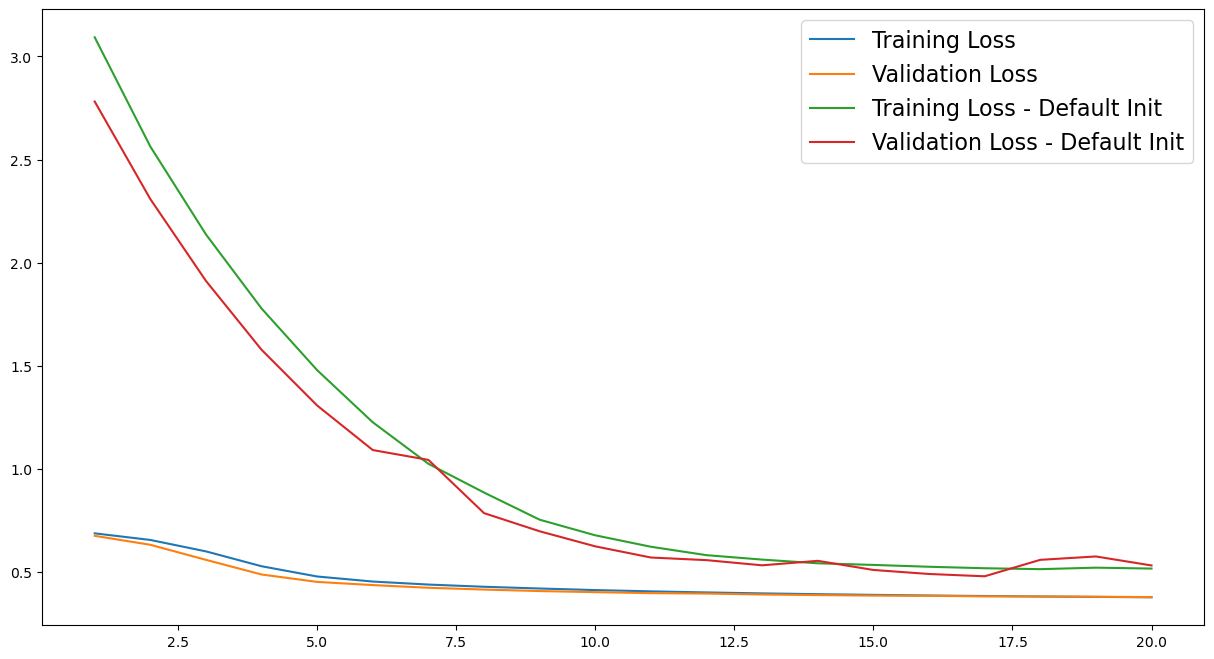

In [28]:
plt.figure(figsize=(15, 8))

plt.plot(np.arange(1, 21), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 21), history.history['val_loss'], label='Validation Loss')


plt.plot(np.arange(1, early_stopping_cb.stopped_epoch+2), history_8.history['loss'], label='Training Loss - Default Init')
plt.plot(np.arange(1, early_stopping_cb.stopped_epoch+2), history_8.history['val_loss'], label='Validation Loss - Default Init')

plt.legend(fontsize=16)
plt.show()

**<font color='blue'>2. What happened to the training loss ?**

In [33]:
tf.config.list_physical_devices("GPU")

[]